# PROJET 2

### LOAD DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

path =r'C:\Users\Akim\Desktop\OpenclassRooms\Projet 2\Projet+Python_Dataset_Edstats_csv\EdStats'
ctry_path = path+'Country.csv'
ctry_ser_path = path +'Country-Series.csv'
data_path = path + 'Data.csv'
footnote_path =  path + 'FootNote.csv'
series_path = path + 'Series.csv'
ctry = pd.read_csv(ctry_path)
ctry_ser = pd.read_csv(ctry_ser_path)
data = pd.read_csv(data_path)
footnote = pd.read_csv(footnote_path)
series = pd.read_csv(series_path)

<AxesSubplot: >

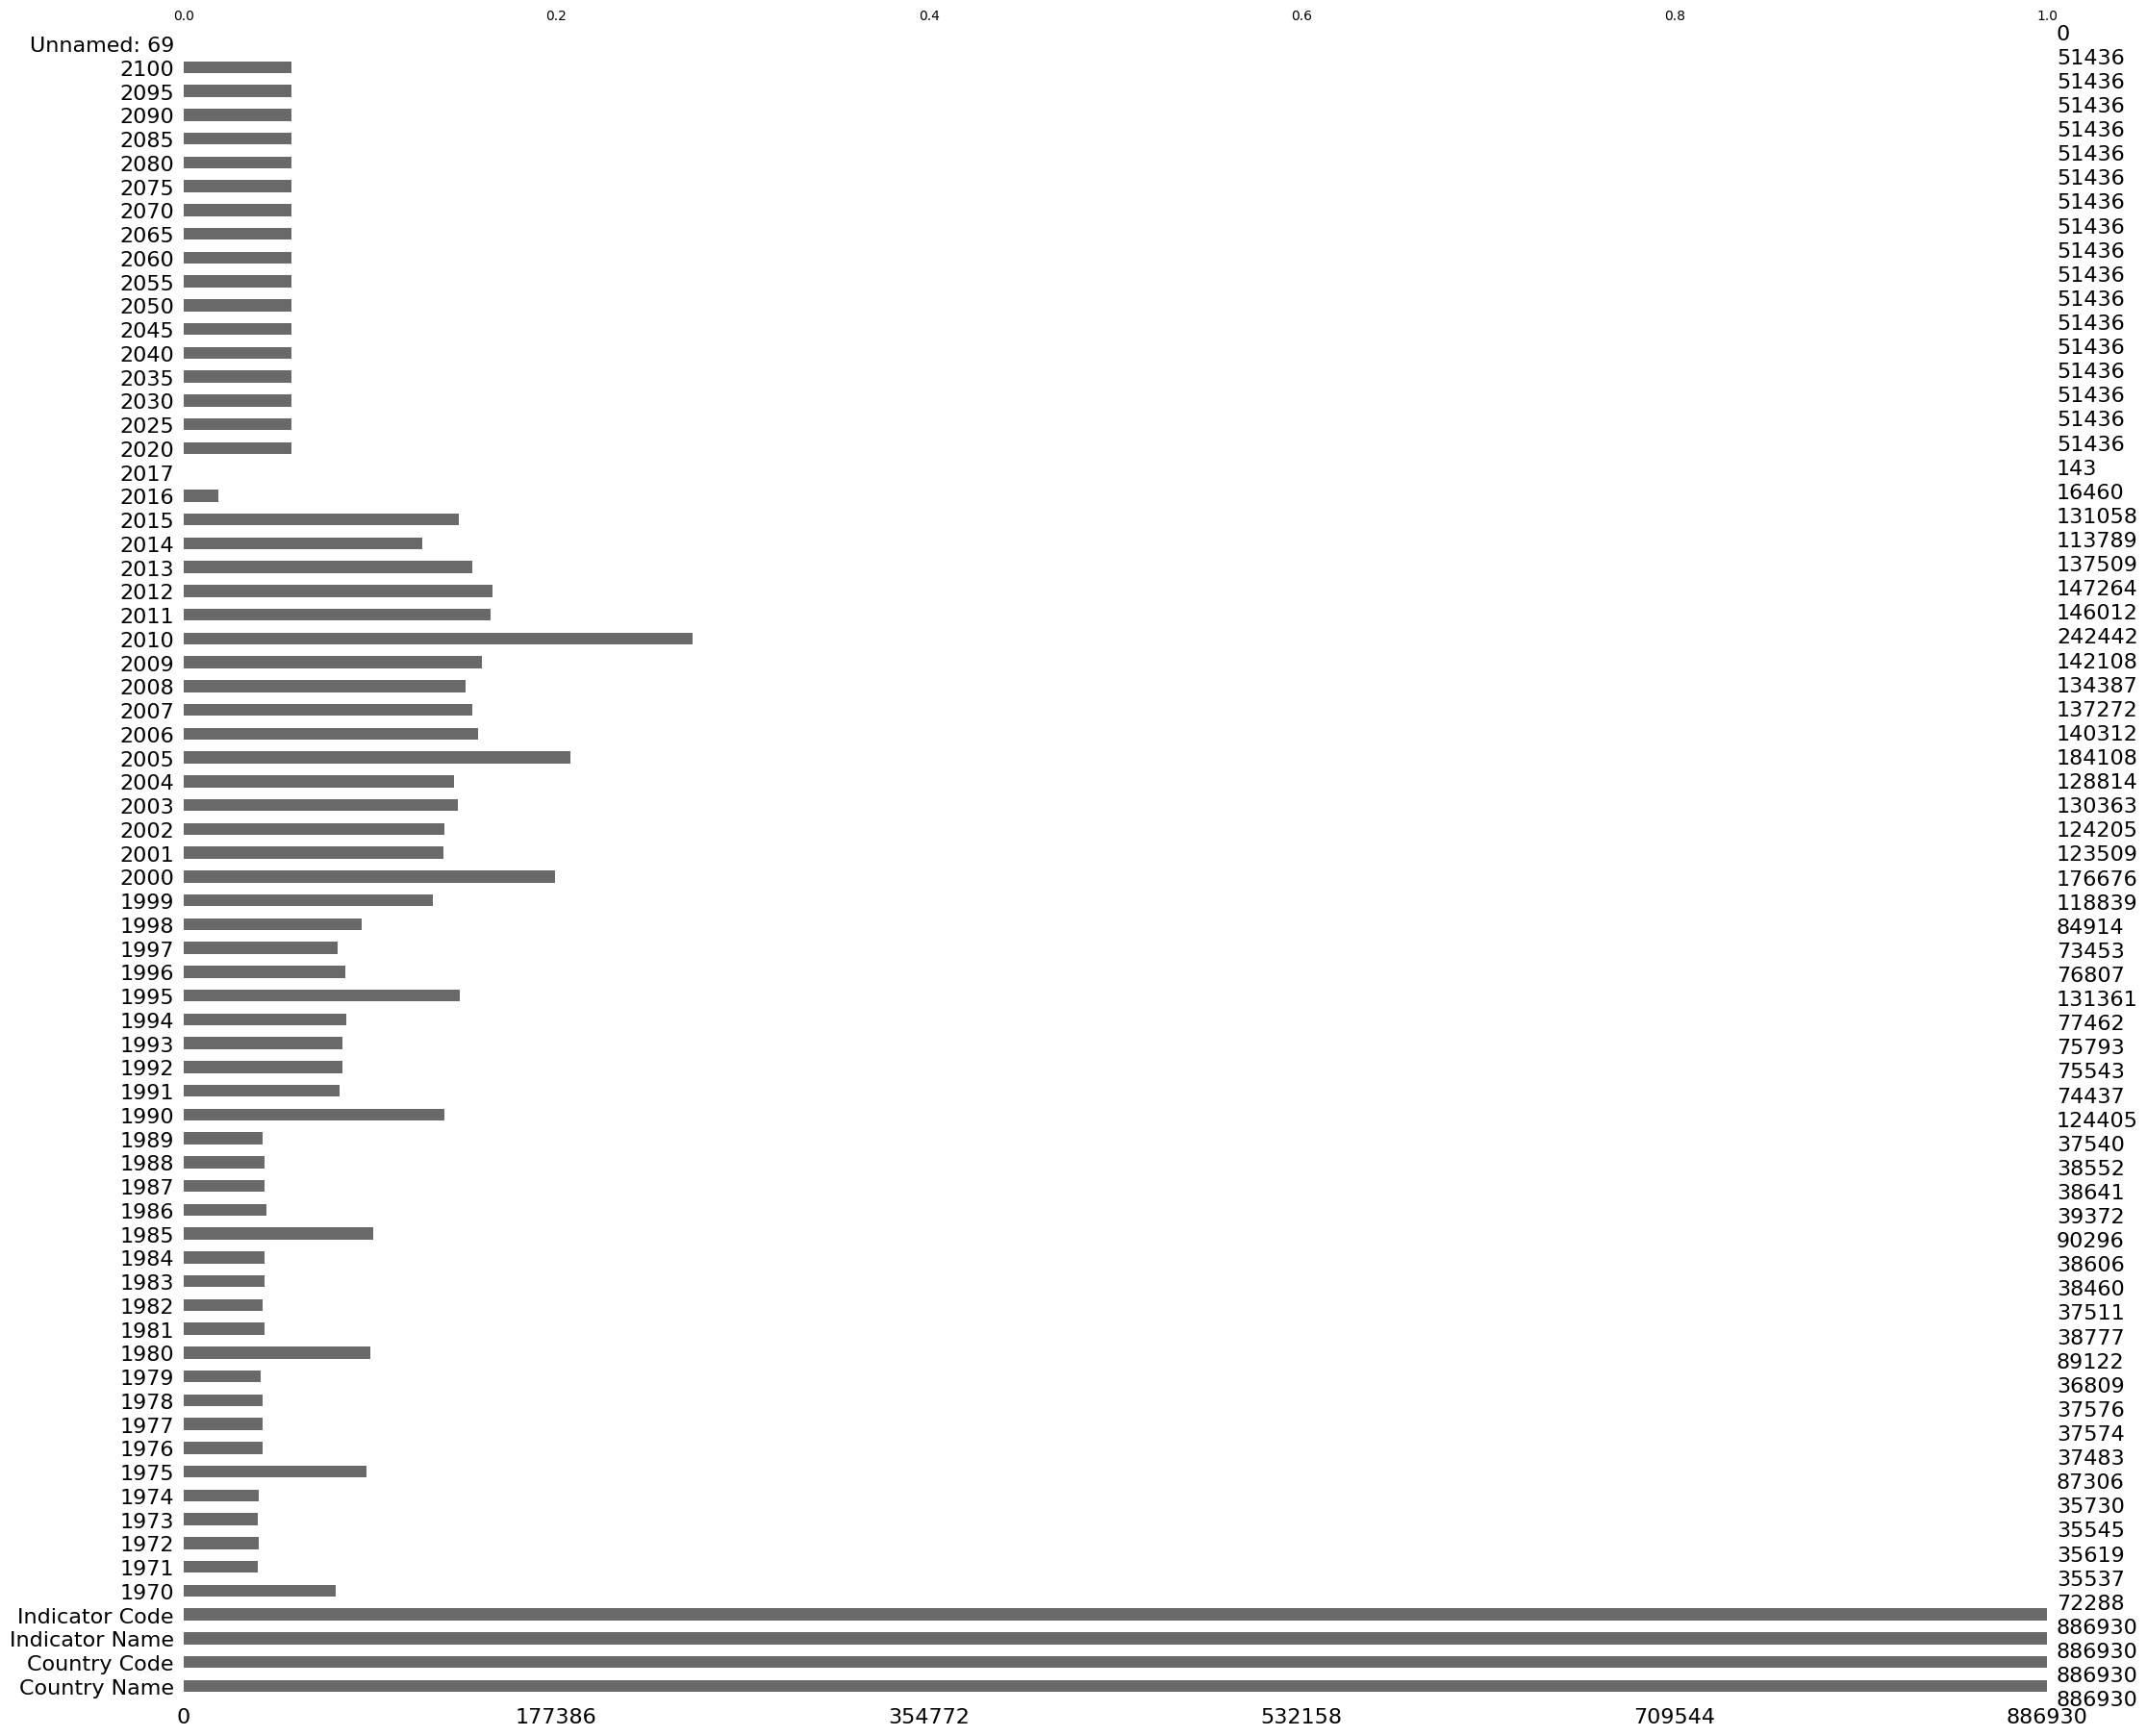

In [2]:
msno.bar(data)

In [3]:
selected_indicators = [
    'Enrolment in secondary education, both sexes (number)',
    'Enrolment in tertiary education, all programmes, both sexes (number)',
    'Capital expenditure as % of total expenditure in secondary public institutions (%)',
    'Capital expenditure as % of total expenditure in tertiary public institutions (%)',
    #'Proportion of youths and adults who have connected and installed new devices (%)', --- NO DATA found ---
    'Population growth (annual %)',
    'Population of compulsory school age, both sexes (number)'
]

In [4]:
#filter on selected indicators
filtered_indicators = data['Indicator Name'].isin(selected_indicators)
data_indicators = data[filtered_indicators]
data_indicators['Indicator Name'].unique()
#data_indicators

array(['Capital expenditure as % of total expenditure in secondary public institutions (%)',
       'Capital expenditure as % of total expenditure in tertiary public institutions (%)',
       'Enrolment in secondary education, both sexes (number)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Population growth (annual %)',
       'Population of compulsory school age, both sexes (number)'],
      dtype=object)

<AxesSubplot: >

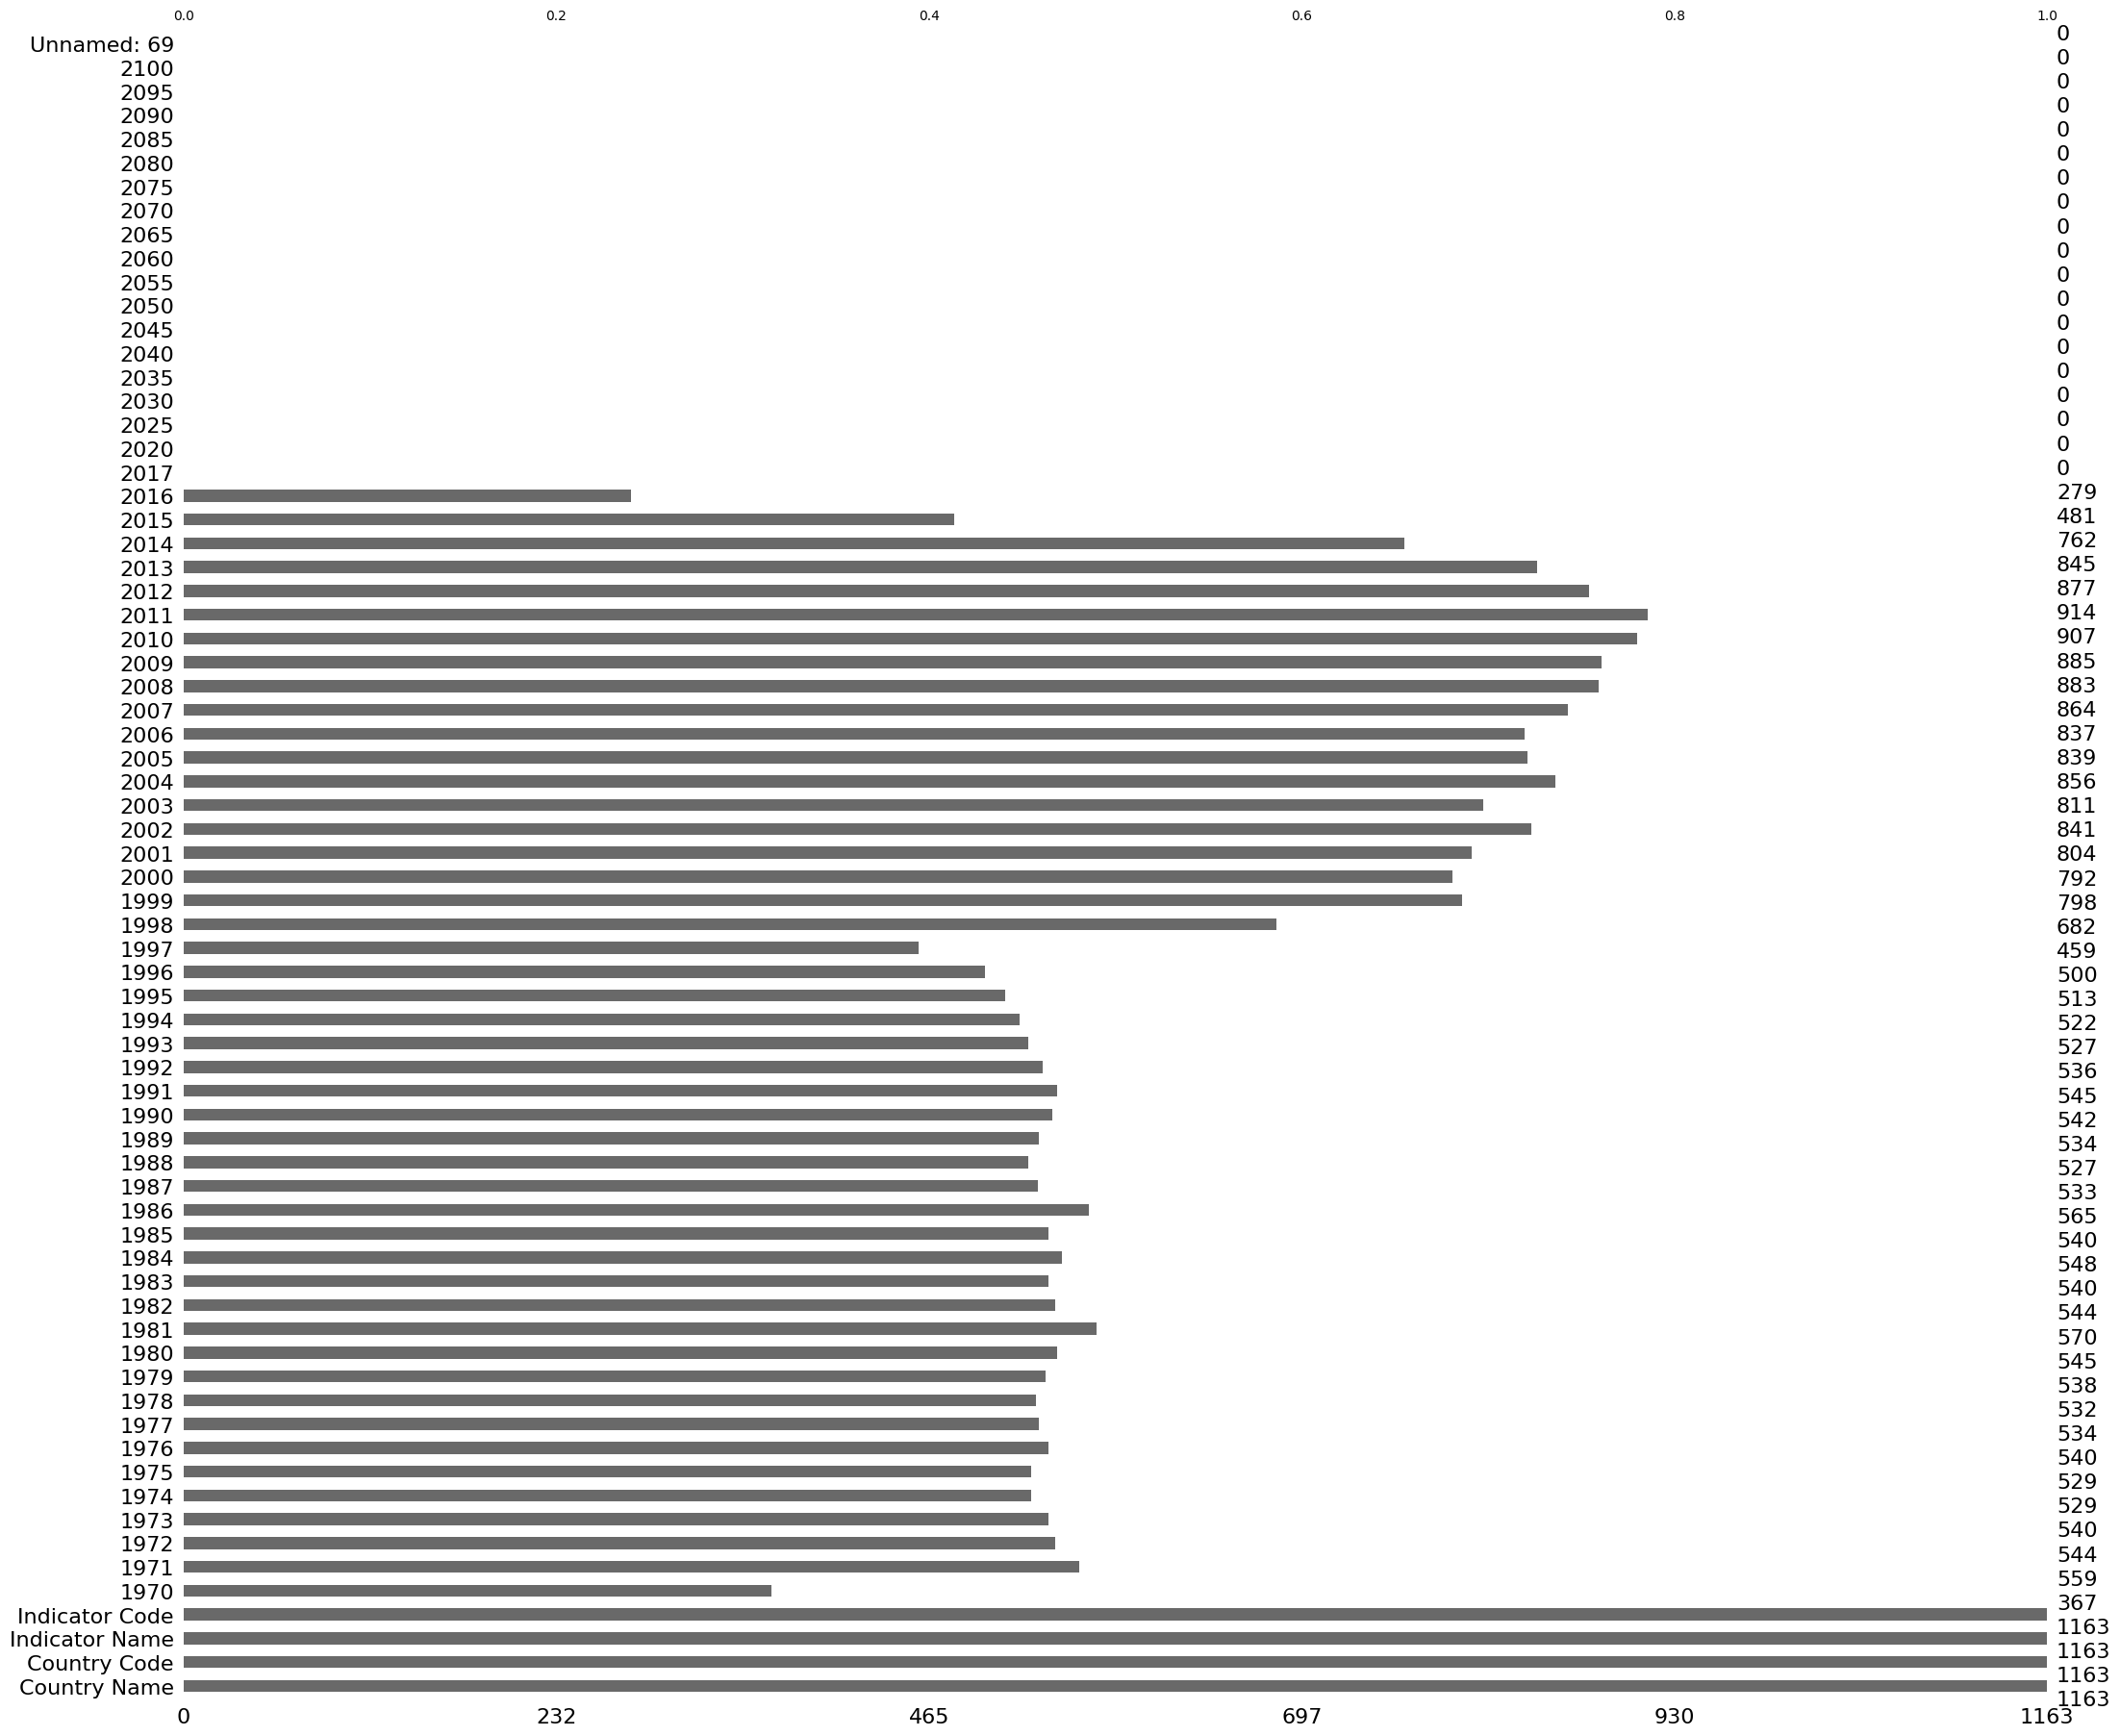

In [5]:
#remove nan
list_cols = ['Country Name', 'Country Code', 'Indicator Code', 'Indicator Name']
data_indicators_dropna= data_indicators.dropna(subset=data_indicators.columns.difference(list_cols), how='all')
msno.bar(data_indicators_dropna)

In [6]:
ma1_tmp = data_indicators_dropna['Country Code'] == 'SLV'
ma2_tmp = data_indicators_dropna['Indicator Code'] == 'SP.POP.GROW'
tmp = data_indicators_dropna[ma1_tmp & ma2_tmp]
tmp

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
310167,El Salvador,SLV,Population growth (annual %),SP.POP.GROW,2.648518,2.59832,2.537537,2.465313,2.38128,2.287852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#add stat columns
data_copy = data_indicators_dropna.copy()
data_copy['NaN'] = data_copy.isnull().sum(axis=1)
data_copy['%NaN'] = (data_copy['NaN']/70)*100 #70 columns found
data_copy['AVG'] = data_indicators_dropna.select_dtypes(include=np.number).mean(axis=1)
data_copy['STD'] = data_indicators_dropna.select_dtypes(include=np.number).std(axis=1)
list_cols.extend(['NaN','%NaN', 'AVG', 'STD']) 
data_stat = data_copy[list_cols]
data_stat.sort_values(by=['NaN'], inplace=True)
data_stat

C:\Users\Akim\AppData\Local\Temp\ipykernel_10816\1130560972.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stat.sort_values(by=['NaN'], inplace=True)


,Country Name,Country Code,Indicator Code,Indicator Name,NaN,%NaN,AVG,STD
310167,El Salvador,SLV,SP.POP.GROW,Population growth (annual %),19,27.142857,1.221914,0.697929
464097,Kiribati,KIR,SP.POP.GROW,Population growth (annual %),19,27.142857,1.748450,0.352839
702322,Senegal,SEN,SP.POP.GROW,Population growth (annual %),19,27.142857,2.800331,0.230417
148907,Bangladesh,BGD,SP.POP.GROW,Population growth (annual %),19,27.142857,2.007904,0.587242
698657,Saudi Arabia,SAU,SP.POP.GROW,Population growth (annual %),19,27.142857,3.726838,1.373998
...,...,...,...,...,...,...,...,...
276079,Curacao,CUW,SE.TER.ENRL,"Enrolment in tertiary education, all programme...",65,92.857143,2196.000000,NaN
374344,Grenada,GRD,UIS.XSPENDP.23.FDPUB.FNCAP,Capital expenditure as % of total expenditure ...,65,92.857143,2.130010,NaN
374345,Grenada,GRD,UIS.XSPENDP.56.FDPUB.FNCAP,Capital expenditure as % of total expenditure ...,65,92.857143,18.642691,NaN
822151,Turkmenistan,TKM,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",65,92.857143,650998.000000,NaN


In [8]:
list_cols.append('Region') 

In [9]:
#Include Region
data_stat_region = pd.merge(data_stat, 
                      ctry, 
                      on ='Country Code', 
                      how ='outer',
                      indicator = True)
#data_stat_region=data_stat_region[list_cols]
data_stat_region

,Country Name,Country Code,Indicator Code,Indicator Name,NaN,%NaN,AVG,STD,Short Name,Table Name,...,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31,_merge
0,El Salvador,SLV,SP.POP.GROW,Population growth (annual %),19,27.142857,1.221914e+00,0.697929,El Salvador,El Salvador,...,2007,"Reproductive Health Survey (RHS), 2008","Integrated household survey (IHS), 2012",Yes,2007/2008,NaN,2012.0,2007,NaN,both
1,El Salvador,SLV,SE.TER.ENRL,"Enrolment in tertiary education, all programme...",28,40.000000,9.758789e+04,48718.427297,El Salvador,El Salvador,...,2007,"Reproductive Health Survey (RHS), 2008","Integrated household survey (IHS), 2012",Yes,2007/2008,NaN,2012.0,2007,NaN,both
2,El Salvador,SLV,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",30,42.857143,3.662357e+05,177892.724260,El Salvador,El Salvador,...,2007,"Reproductive Health Survey (RHS), 2008","Integrated household survey (IHS), 2012",Yes,2007/2008,NaN,2012.0,2007,NaN,both
3,El Salvador,SLV,UIS.SAP.CE,"Population of compulsory school age, both sexe...",48,68.571429,1.222377e+06,88384.628036,El Salvador,El Salvador,...,2007,"Reproductive Health Survey (RHS), 2008","Integrated household survey (IHS), 2012",Yes,2007/2008,NaN,2012.0,2007,NaN,both
4,El Salvador,SLV,UIS.XSPENDP.23.FDPUB.FNCAP,Capital expenditure as % of total expenditure ...,61,87.142857,1.452456e+01,5.052492,El Salvador,El Salvador,...,2007,"Reproductive Health Survey (RHS), 2008","Integrated household survey (IHS), 2012",Yes,2007/2008,NaN,2012.0,2007,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,Curacao,CUW,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",65,92.857143,1.121900e+04,NaN,Curaçao,Curaçao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
1159,Curacao,CUW,SE.TER.ENRL,"Enrolment in tertiary education, all programme...",65,92.857143,2.196000e+03,NaN,Curaçao,Curaçao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
1160,Sint Maarten (Dutch part),SXM,SP.POP.GROW,Population growth (annual %),51,72.857143,1.595832e+00,2.672532,Sint Maarten (Dutch part),Sint Maarten (Dutch part),...,2011,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,both
1161,Sint Maarten (Dutch part),SXM,SE.TER.ENRL,"Enrolment in tertiary education, all programme...",63,90.000000,1.823333e+02,10.214369,Sint Maarten (Dutch part),Sint Maarten (Dutch part),...,2011,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,both


In [10]:
#Find values not in both tables
ma_not_both = data_stat_region['_merge'] != 'both'
data_stat_region[ma_not_both]

,Country Name,Country Code,Indicator Code,Indicator Name,NaN,%NaN,AVG,STD,Short Name,Table Name,...,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31,_merge
1142,British Virgin Islands,VGB,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",36,51.428571,1421.833333,475.006285,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1143,British Virgin Islands,VGB,SE.TER.ENRL,"Enrolment in tertiary education, all programme...",59,84.285714,886.714286,205.941508,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [11]:
#Filter on useful columns
data_plot = data_stat_region[['Indicator Name','Country Code','AVG','STD','%NaN','Region']]
data_plot

,Indicator Name,Country Code,AVG,STD,%NaN,Region
0,Population growth (annual %),SLV,1.221914e+00,0.697929,27.142857,Latin America & Caribbean
1,"Enrolment in tertiary education, all programme...",SLV,9.758789e+04,48718.427297,40.000000,Latin America & Caribbean
2,"Enrolment in secondary education, both sexes (...",SLV,3.662357e+05,177892.724260,42.857143,Latin America & Caribbean
3,"Population of compulsory school age, both sexe...",SLV,1.222377e+06,88384.628036,68.571429,Latin America & Caribbean
4,Capital expenditure as % of total expenditure ...,SLV,1.452456e+01,5.052492,87.142857,Latin America & Caribbean
...,...,...,...,...,...,...
1158,"Enrolment in secondary education, both sexes (...",CUW,1.121900e+04,NaN,92.857143,Latin America & Caribbean
1159,"Enrolment in tertiary education, all programme...",CUW,2.196000e+03,NaN,92.857143,Latin America & Caribbean
1160,Population growth (annual %),SXM,1.595832e+00,2.672532,72.857143,Latin America & Caribbean
1161,"Enrolment in tertiary education, all programme...",SXM,1.823333e+02,10.214369,90.000000,Latin America & Caribbean


In [12]:
data_plot['Indicator Name'].unique()

array(['Population growth (annual %)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in secondary education, both sexes (number)',
       'Population of compulsory school age, both sexes (number)',
       'Capital expenditure as % of total expenditure in secondary public institutions (%)',
       'Capital expenditure as % of total expenditure in tertiary public institutions (%)'],
      dtype=object)

### ANALYSIS SCATTER PLOTS (COUNTRY)

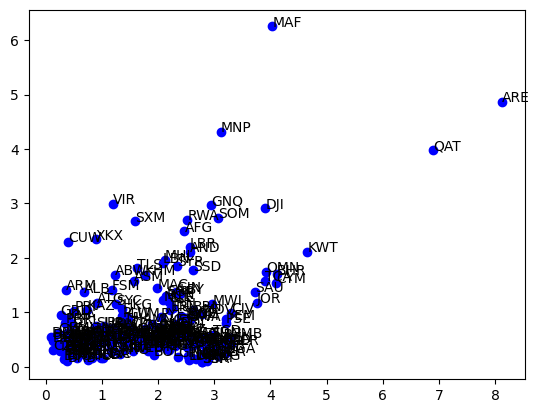

In [13]:
#Filter by indicator

ma_ind = data_plot['Indicator Name'] == 'Population growth (annual %)'
ma_avg = data_plot['AVG'] > 0
data_plot_pop_g = data_plot[ma_ind & ma_avg]

data_plot_np = data_plot_pop_g.to_numpy()
for i in data_plot_np:
    x = i[2]
    y = i[3]
    plt.plot(x, y, 'bo')
    plt.text(x, y , i[1], fontsize=10)
plt.show()

posx and posy should be finite values
posx and posy should be finite values


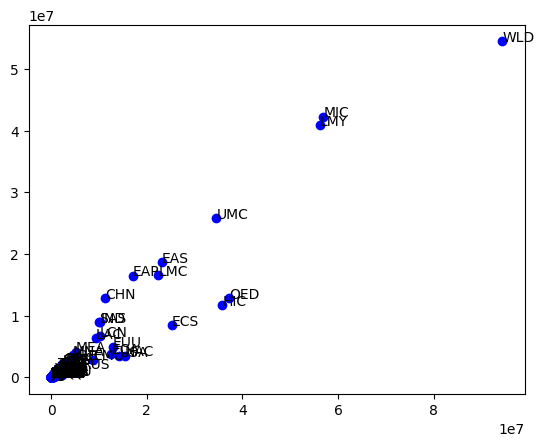

In [14]:
#Filter by indicator

ma_ind = data_plot['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)'
ma_avg = data_plot['AVG'] > 0
data_plot_enr_t = data_plot[ma_ind & ma_avg]

data_plot_np = data_plot_enr_t.to_numpy()
for i in data_plot_np:
    x = i[2]
    y = i[3]
    plt.plot(x, y, 'bo')
    plt.text(x, y , i[1], fontsize=10)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


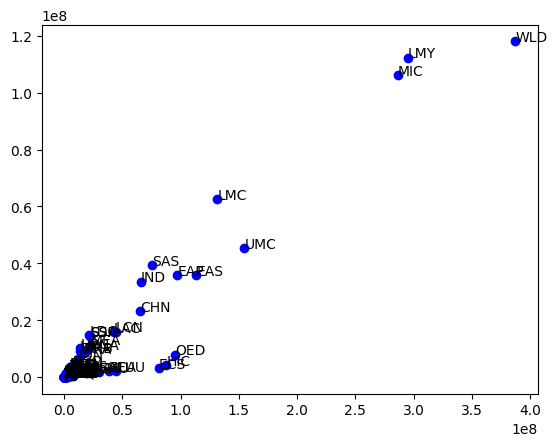

In [15]:
#Filter by indicator

ma_ind = data_plot['Indicator Name'] == 'Enrolment in secondary education, both sexes (number)'
ma_avg = data_plot['AVG'] > 0
data_plot_enr_s = data_plot[ma_ind & ma_avg]

data_plot_np = data_plot_enr_s.to_numpy()
for i in data_plot_np:
    x = i[2]
    y = i[3]
    plt.plot(x, y, 'bo')
    plt.text(x, y , i[1], fontsize=10)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


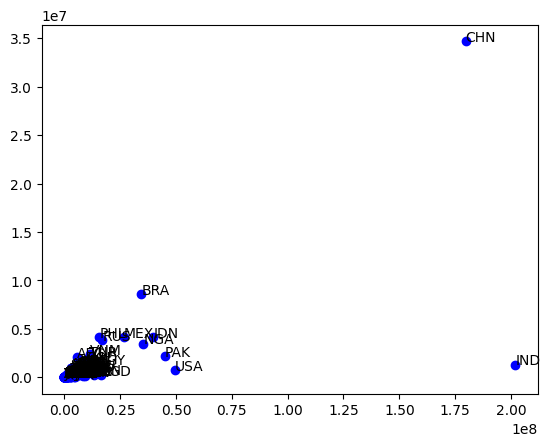

In [16]:
#Filter by indicator

ma_ind = data_plot['Indicator Name'] == 'Population of compulsory school age, both sexes (number)'
ma_avg = data_plot['AVG'] > 0
data_plot_pop_c = data_plot[ma_ind & ma_avg]

data_plot_np = data_plot_pop_c.to_numpy()
for i in data_plot_np:
    x = i[2]
    y = i[3]
    plt.plot(x, y, 'bo')
    plt.text(x, y , i[1], fontsize=10)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

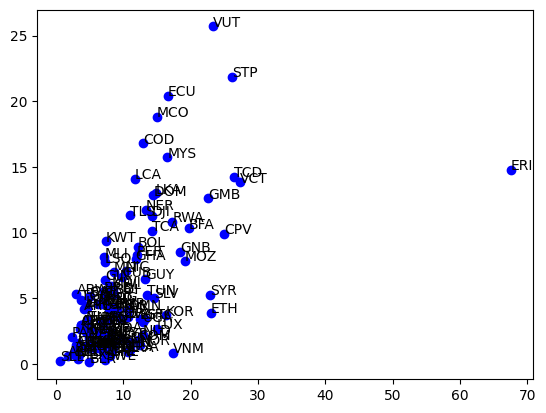

In [17]:
#Filter by indicator

ma_ind = data_plot['Indicator Name'] == 'Capital expenditure as % of total expenditure in secondary public institutions (%)'
ma_avg = data_plot['AVG'] 
data_plot_cap_s = data_plot[ma_ind & ma_avg]

data_plot_np = data_plot_cap_s.to_numpy()
for i in data_plot_np:
    x = i[2]
    y = i[3]
    plt.plot(x, y, 'bo')
    plt.text(x, y , i[1], fontsize=10)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

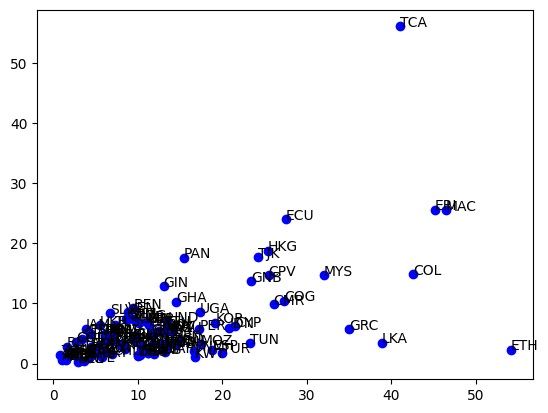

In [18]:
#Filter by indicator

ma_ind = data_plot['Indicator Name'] == 'Capital expenditure as % of total expenditure in tertiary public institutions (%)'
ma_avg = data_plot['AVG']
data_plot_cap_t = data_plot[ma_ind & ma_avg]

data_plot_np = data_plot_cap_t.to_numpy()
for i in data_plot_np:
    x = i[2]
    y = i[3]
    plt.plot(x, y, 'bo')
    plt.text(x, y , i[1], fontsize=10)
plt.show()

In [19]:
#Transpose data_indicators
data_indicators_t = data_indicators.set_index(['Country Code','Indicator Code','Country Name','Indicator Name']).stack().reset_index(level=2, drop=True).reset_index(name='value')
data_indicators_t

,Country Code,Indicator Code,Indicator Name,level_3,value
0,ARB,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",1970,4842861.5
1,ARB,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",1971,4981843.5
2,ARB,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",1972,5270417.5
3,ARB,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",1973,5593058.5
4,ARB,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",1974,5938865.5
...,...,...,...,...,...
29754,ZWE,UIS.SAP.CE,"Population of compulsory school age, both sexe...",2010,2520854.0
29755,ZWE,UIS.SAP.CE,"Population of compulsory school age, both sexe...",2011,2554192.0
29756,ZWE,UIS.SAP.CE,"Population of compulsory school age, both sexe...",2012,2602762.0
29757,ZWE,UIS.SAP.CE,"Population of compulsory school age, both sexe...",2013,2664843.0


In [20]:
#Get unique ID per row
data_indicators_t['ID'] = data_indicators_t[['Country Code', 'Indicator Code']].apply("-".join, axis=1)
data_indicators_t = data_indicators_t.drop(['Indicator Name','Indicator Code', 'Country Code'], axis=1)
data_indicators_t.rename(columns={'level_3':'year'}, inplace=True)
data_indicators_t

,year,value,ID
0,1970,4842861.5,ARB-SE.SEC.ENRL
1,1971,4981843.5,ARB-SE.SEC.ENRL
2,1972,5270417.5,ARB-SE.SEC.ENRL
3,1973,5593058.5,ARB-SE.SEC.ENRL
4,1974,5938865.5,ARB-SE.SEC.ENRL
...,...,...,...
29754,2010,2520854.0,ZWE-UIS.SAP.CE
29755,2011,2554192.0,ZWE-UIS.SAP.CE
29756,2012,2602762.0,ZWE-UIS.SAP.CE
29757,2013,2664843.0,ZWE-UIS.SAP.CE


In [21]:
#Forecast via Average Moving

data_indicators_t['mean'] = (data_indicators_t.groupby('ID')['value']
                .rolling(window=10)
                .mean()
                .reset_index(level=0, drop=True))

data_indicators_t['forecast'] = data_indicators_t['year'].astype('int') + 10
data_indicators_t

,year,value,ID,mean,forecast
0,1970,4842861.5,ARB-SE.SEC.ENRL,NaN,1980
1,1971,4981843.5,ARB-SE.SEC.ENRL,NaN,1981
2,1972,5270417.5,ARB-SE.SEC.ENRL,NaN,1982
3,1973,5593058.5,ARB-SE.SEC.ENRL,NaN,1983
4,1974,5938865.5,ARB-SE.SEC.ENRL,NaN,1984
...,...,...,...,...,...
29754,2010,2520854.0,ZWE-UIS.SAP.CE,2463817.8,2020
29755,2011,2554192.0,ZWE-UIS.SAP.CE,2472865.3,2021
29756,2012,2602762.0,ZWE-UIS.SAP.CE,2486949.5,2022
29757,2013,2664843.0,ZWE-UIS.SAP.CE,2507702.4,2023


In [22]:
#Split column ID --> Ctry and Indicator
data_indicators_t[['Ctry', 'Ind']] = data_indicators_t['ID'].str.split('-', expand = True)

### ANALYSIS COUNTRY

##### SP.POP.GROW

In [23]:
#Find top 10 countries
ind_label = 'SP.POP.GROW'
ma_ind = data_indicators_t['Ind'] == ind_label
ma_fcst = data_indicators_t['forecast'] == 2026
data_plot = data_indicators_t[ma_ind & ma_fcst]
data_plot = data_plot.sort_values('mean', ascending=False).head(10)
list_ctry = data_plot['Ctry']

#Top 10 historical data
ma_ctry = data_indicators_t['Ctry'].isin(list_ctry)
data_plot_filt_ctry_popgrow = data_indicators_t[ma_ind & ma_ctry]

#Remove nan
ma_mean_na = data_plot_filt_ctry_popgrow['mean'].isna()
data_plot_filt_ctry_popgrow = data_plot_filt_ctry_popgrow[~ma_mean_na]

#Plot top 10 Ctry
px.line(data_plot_filt_ctry_popgrow, x = 'forecast', y = 'mean', color = 'Ctry', title=ind_label)

##### SE.SEC.ENRL

In [24]:
#Find top 10 countries
ind_label = 'SE.SEC.ENRL'
ma_ind = data_indicators_t['Ind'] == ind_label
ma_fcst = data_indicators_t['forecast'] == 2026
data_plot = data_indicators_t[ma_ind & ma_fcst]
data_plot = data_plot.sort_values('mean', ascending=False).head(10)
list_ctry = data_plot['Ctry']

#Top 10 historical data
ma_ctry = data_indicators_t['Ctry'].isin(list_ctry)
data_plot_filt_ctry_secenrl = data_indicators_t[ma_ind & ma_ctry]

#Remove nan
ma_mean_na = data_plot_filt_ctry_secenrl['mean'].isna()
data_plot_filt_ctry_secenrl = data_plot_filt_ctry_secenrl[~ma_mean_na]

#Plot top 10 Ctry
px.line(data_plot_filt_ctry_secenrl, x = 'forecast', y = 'mean', color = 'Ctry', title=ind_label)

##### SE.TER.ENRL

In [25]:
#Find top 10 countries
ind_label = 'SE.TER.ENRL'
ma_ind = data_indicators_t['Ind'] == ind_label
ma_fcst = data_indicators_t['forecast'] == 2025
data_plot = data_indicators_t[ma_ind & ma_fcst]
data_plot = data_plot.sort_values('mean', ascending=False).head(10)
list_ctry = data_plot['Ctry']

#Top 10 historical data
ma_fcst = data_indicators_t['Ctry'].isin(list_ctry)
data_plot_filt_ctry_terenrl = data_indicators_t[ma_ind & ma_fcst]

#Remove nan
ma_mean_na = data_plot_filt_ctry_terenrl['mean'].isna()
data_plot_filt_ctry_terenrl = data_plot_filt_ctry_terenrl[~ma_mean_na]

#Plot top 10 Ctry
px.line(data_plot_filt_ctry_terenrl, x = 'forecast', y = 'mean', color = 'Ctry', title=ind_label)

##### UIS.SAP.CE

In [26]:
#Find top 10 countries
ind_label = 'UIS.SAP.CE'
ma_ind = data_indicators_t['Ind'] == ind_label
ma_fcst = data_indicators_t['forecast'] == 2026
data_plot = data_indicators_t[ma_ind & ma_fcst]
data_plot = data_plot.sort_values('mean', ascending=False).head(10)

list_ctry = data_plot['Ctry']

#Top 10 historical data
ma_ctry = data_indicators_t['Ctry'].isin(list_ctry)
data_plot_filt_ctry_sapce = data_indicators_t[ma_ind & ma_ctry]

#Remove nan
ma_mean_na = data_plot_filt_ctry_sapce['mean'].isna()
data_plot_filt_ctry_sapce = data_plot_filt_ctry_sapce[~ma_mean_na]

#Plot top 10 Ctry
px.line(data_plot_filt_ctry_sapce, x = 'forecast', y = 'mean', color = 'Ctry', title=ind_label)



##### UIS.XSPENDP.23.FDPUB.FNCAP

In [27]:
#Find top 10 countries
ind_label = 'UIS.XSPENDP.23.FDPUB.FNCAP'
ma_ind = data_indicators_t['Ind'] == ind_label
ma_fcst = data_indicators_t['forecast'] == 2023
data_plot = data_indicators_t[ma_ind & ma_fcst]
data_plot = data_plot.sort_values('mean', ascending=False).head(10)
list_ctry = data_plot['Ctry']

#Top 10 historical data
ma_ctry = data_indicators_t['Ctry'].isin(list_ctry)
data_plot_filt_ctry_xpend23 = data_indicators_t[ma_ind & ma_ctry]

#Remove nan
ma_mean_na = data_plot_filt_ctry_xpend23['mean'].isna()
data_plot_filt_ctry_xpend23 = data_plot_filt_ctry_xpend23[~ma_mean_na]

#Plot top 10 Ctry
px.line(data_plot_filt_ctry_xpend23, x = 'forecast', y = 'mean', color = 'Ctry', title=ind_label)

##### UIS.XSPENDP.56.FDPUB.FNCAP

In [28]:
#Find top 10 countries
ind_label = 'UIS.XSPENDP.56.FDPUB.FNCAP'
ma_ind = data_indicators_t['Ind'] == ind_label
ma_fcst = data_indicators_t['forecast'] == 2023
data_plot = data_indicators_t[ma_ind & ma_fcst]
data_plot = data_plot.sort_values('mean', ascending=False).head(10)
list_ctry = data_plot['Ctry']

#Top 10 historical data
ma_ctry = data_indicators_t['Ctry'].isin(list_ctry)
data_plot_filt_ctry_xpend56 = data_indicators_t[ma_ind & ma_ctry]

#Remove nan
ma_mean_na = data_plot_filt_ctry_xpend56['mean'].isna()
data_plot_filt_ctry_xpend56 = data_plot_filt_ctry_xpend56[~ma_mean_na]

#Plot top 10 Ctry
px.line(data_plot_filt_ctry_xpend56, x = 'forecast', y = 'mean', color = 'Ctry', title=ind_label)

In [29]:
#results:

# Top 10 in 3 indicators
#1. gha
#2. per

# Top 10 in 2 indicators
#3. ecu (+ 2 appearances in scatter plots)
#4. jpn
#5. kaz
#6. kor
#7. lva
#8. nld
#9. esp

### ANALYSIS REGION

In [30]:
#Include Region
ctry_copy = ctry.copy()
ctry_copy = ctry_copy.rename(columns={'Country Code':'Ctry'})
data_indicators_t_reg = pd.merge(data_indicators_t, 
                      ctry_copy, 
                      on ='Ctry', 
                      how ='outer',
                      indicator = True)
data_indicators_t_reg

,year,value,ID,mean,forecast,Ctry,Ind,Short Name,Table Name,Long Name,...,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31,_merge
0,1970,4842861.5,ARB-SE.SEC.ENRL,NaN,1980,ARB,SE.SEC.ENRL,Arab World,Arab World,Arab World,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
1,1971,4981843.5,ARB-SE.SEC.ENRL,NaN,1981,ARB,SE.SEC.ENRL,Arab World,Arab World,Arab World,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
2,1972,5270417.5,ARB-SE.SEC.ENRL,NaN,1982,ARB,SE.SEC.ENRL,Arab World,Arab World,Arab World,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
3,1973,5593058.5,ARB-SE.SEC.ENRL,NaN,1983,ARB,SE.SEC.ENRL,Arab World,Arab World,Arab World,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
4,1974,5938865.5,ARB-SE.SEC.ENRL,NaN,1984,ARB,SE.SEC.ENRL,Arab World,Arab World,Arab World,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29754,2010,2520854.0,ZWE-UIS.SAP.CE,2463817.8,2020,ZWE,UIS.SAP.CE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,...,2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN,both
29755,2011,2554192.0,ZWE-UIS.SAP.CE,2472865.3,2021,ZWE,UIS.SAP.CE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,...,2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN,both
29756,2012,2602762.0,ZWE-UIS.SAP.CE,2486949.5,2022,ZWE,UIS.SAP.CE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,...,2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN,both
29757,2013,2664843.0,ZWE-UIS.SAP.CE,2507702.4,2023,ZWE,UIS.SAP.CE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,...,2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN,both


In [40]:
#Group by region, forecast, ind
data_indicators_t_reg_cols = data_indicators_t_reg[['Region','mean','forecast','Ind']]
data_indicators_t_reg_cols_grby = data_indicators_t_reg_cols.groupby(['Region','forecast','Ind'])['mean'].mean()
data_indicators_t_reg_cols_grby = data_indicators_t_reg_cols_grby.reset_index()

##### SP.POP.GROW

In [32]:
#Find top 10 regions
ind_label = 'SP.POP.GROW'
ma_ind = data_indicators_t_reg_cols_grby['Ind'] == ind_label
ma_fcst = data_indicators_t_reg_cols_grby['forecast'] == 2026
data_plot = data_indicators_t_reg_cols_grby[ma_ind & ma_fcst]
data_plot = data_plot.sort_values('mean', ascending=False).head(10)
list_region = data_plot['Region']

#Top 10 historical data
ma_region = data_indicators_t_reg_cols_grby['Region'].isin(list_region)
data_plot_filt_region_popgrow = data_indicators_t_reg_cols_grby[ma_ind & ma_region]

#Remove nan
ma_mean_na = data_plot_filt_region_popgrow['mean'].isna()
data_plot_filt_region_popgrow = data_plot_filt_region_popgrow[~ma_mean_na]

#Plot top 10 Region
px.line(data_plot_filt_region_popgrow, x = 'forecast', y = 'mean', color = 'Region', title=ind_label)

##### SE.SEC.ENRL

In [33]:
#Find top 10 regions
ind_label = 'SE.SEC.ENRL'
ma_ind = data_indicators_t_reg_cols_grby['Ind'] == ind_label
ma_fcst = data_indicators_t_reg_cols_grby['forecast'] == 2026
data_plot = data_indicators_t_reg_cols_grby[ma_ind & ma_fcst]
data_plot = data_plot.sort_values('mean', ascending=False).head(10)
list_region = data_plot['Region']

#Top 10 historical data
ma_region = data_indicators_t_reg_cols_grby['Region'].isin(list_region)
data_plot_filt_region_secenrl = data_indicators_t_reg_cols_grby[ma_ind & ma_region]

#Remove nan
ma_mean_na = data_plot_filt_region_secenrl['mean'].isna()
data_plot_filt_region_secenrl = data_plot_filt_region_secenrl[~ma_mean_na]

#Plot top 10 Region
px.line(data_plot_filt_region_secenrl, x = 'forecast', y = 'mean', color = 'Region', title=ind_label)

##### SE.TER.ENRL

In [34]:
#Find top 10 regions
ind_label = 'SE.TER.ENRL'
ma_ind = data_indicators_t_reg_cols_grby['Ind'] == ind_label
ma_fcst = data_indicators_t_reg_cols_grby['forecast'] == 2025
data_plot = data_indicators_t_reg_cols_grby[ma_ind & ma_fcst]
data_plot = data_plot.sort_values('mean', ascending=False).head(10)
list_region = data_plot['Region']

#Top 10 historical data
ma_region = data_indicators_t_reg_cols_grby['Region'].isin(list_region)
data_plot_filt_region_terenrl = data_indicators_t_reg_cols_grby[ma_ind & ma_region]

#Remove nan
ma_mean_na = data_plot_filt_region_terenrl['mean'].isna()
data_plot_filt_region_terenrl = data_plot_filt_region_terenrl[~ma_mean_na]

#Plot top 10 Region
px.line(data_plot_filt_region_terenrl, x = 'forecast', y = 'mean', color = 'Region', title=ind_label)

##### UIS.SAP.CE

In [35]:
#Find top 10 regions
ind_label = 'UIS.SAP.CE'
ma_ind = data_indicators_t_reg_cols_grby['Ind'] == ind_label
ma_fcst = data_indicators_t_reg_cols_grby['forecast'] == 2024
data_plot = data_indicators_t_reg_cols_grby[ma_ind & ma_fcst]
data_plot = data_plot.sort_values('mean', ascending=False).head(10)
list_region = data_plot['Region']

#Top 10 historical data
ma_region = data_indicators_t_reg_cols_grby['Region'].isin(list_region)
data_plot_filt_region_sapce = data_indicators_t_reg_cols_grby[ma_ind & ma_region]

#Remove nan
ma_mean_na = data_plot_filt_region_sapce['mean'].isna()
data_plot_filt_region_sapce = data_plot_filt_region_sapce[~ma_mean_na]

#Plot top 10 Region
px.line(data_plot_filt_region_sapce, x = 'forecast', y = 'mean', color = 'Region', title=ind_label)

##### UIS.XSPENDP.23.FDPUB.FNCAP

In [36]:
#Find top 10 regions
ind_label = 'UIS.XSPENDP.23.FDPUB.FNCAP'
ma_ind = data_indicators_t_reg_cols_grby['Ind'] == ind_label
ma_fcst = data_indicators_t_reg_cols_grby['forecast'] == 2024
data_plot = data_indicators_t_reg_cols_grby[ma_ind & ma_fcst]
data_plot = data_plot.sort_values('mean', ascending=False).head(10)
list_region = data_plot['Region']

#Top 10 historical data
ma_region = data_indicators_t_reg_cols_grby['Region'].isin(list_region)
data_plot_filt_region_xpend23 = data_indicators_t_reg_cols_grby[ma_ind & ma_region]

#Remove nan
ma_mean_na = data_plot_filt_region_xpend23['mean'].isna()
data_plot_filt_region_xpend23 = data_plot_filt_region_xpend23[~ma_mean_na]

#Plot top 10 Region
px.line(data_plot_filt_region_xpend23, x = 'forecast', y = 'mean', color = 'Region', title=ind_label)

##### UIS.XSPENDP.56.FDPUB.FNCAP

In [37]:
#Find top 10 regions
ind_label = 'UIS.XSPENDP.56.FDPUB.FNCAP'
ma_ind = data_indicators_t_reg_cols_grby['Ind'] == ind_label
ma_fcst = data_indicators_t_reg_cols_grby['forecast'] == 2024
data_plot = data_indicators_t_reg_cols_grby[ma_ind & ma_fcst]
data_plot = data_plot.sort_values('mean', ascending=False).head(10)
list_region = data_plot['Region']

#Top 10 historical data
ma_region = data_indicators_t_reg_cols_grby['Region'].isin(list_region)
data_plot_filt_region_xpend56 = data_indicators_t_reg_cols_grby[ma_ind & ma_region]

#Remove nan
ma_mean_na = data_plot_filt_region_xpend56['mean'].isna()
data_plot_filt_region_xpend56 = data_plot_filt_region_xpend56[~ma_mean_na]

#Plot top 10 Region
px.line(data_plot_filt_region_xpend56, x = 'forecast', y = 'mean', color = 'Region', title=ind_label)

In [38]:
#Rank per region and indicator
concat_top10_region = pd.concat([data_plot_filt_region_popgrow,data_plot_filt_region_secenrl,data_plot_filt_region_terenrl,data_plot_filt_region_sapce,data_plot_filt_region_xpend23, data_plot_filt_region_xpend56])
region_rank= concat_top10_region[['Region','mean','Ind']]
region_rank = region_rank.groupby(['Region','Ind'])['mean'].mean()
region_rank = region_rank.reset_index()
region_rank['Rank']= region_rank.groupby('Ind')['mean'].rank(ascending=False)

#Average Rank by region
region_rank= region_rank[['Region','Rank']]
region_rank = region_rank.groupby(['Region'])['Rank'].mean()
region_rank

Region
East Asia & Pacific           2.333333
Europe & Central Asia         4.500000
Latin America & Caribbean     4.166667
Middle East & North Africa    3.666667
North America                 3.500000
South Asia                    1.750000
Sub-Saharan Africa            5.333333
Name: Rank, dtype: float64

### FINAL RESULTS

In [39]:
#Top 10 in 3 indicators
#1. per (in top 5 regions)
#2. gha (in top 7 regions)

# Top 10 in 2 indicators
#3. jpn (in top 2 regions)
#4. kor (in top 2 regions)
#5. ecu (2 appearances in scatter plots, in top 5 regions)
#6. nld (in top 6 regions)
#7. esp (in top 6 regions)
#8. lva (in top 6 regions)
#9. kaz (in top 6 regions)